In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
heart=fetch_openml(name="heart-disease", version=1, as_frame=True)

df=heart.frame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [6]:
df["target"].value_counts()

target
1.0    165
0.0    138
Name: count, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

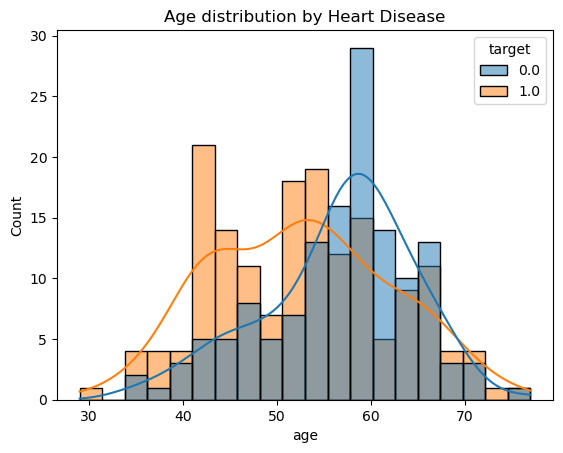

In [8]:
sns.histplot(data=df, x="age", hue="target", bins=20, kde=True)
plt.title("Age distribution by Heart Disease")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
X=df.drop("target", axis=1)
y=df["target"]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
train_acc=accuracy_score(y_train, tree.predict(X_train))
test_acc=accuracy_score(y_test, tree.predict(X_test))

train_acc, test_acc

(1.0, 0.7540983606557377)

In [14]:
tree.get_depth()

9

In [15]:
tree.get_n_leaves()

np.int64(41)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
forest=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
train_acc_forest=accuracy_score(y_train, forest.predict(X_train))
test_acc_forest=accuracy_score(y_test, forest.predict(X_test))

train_acc_forest, test_acc_forest

(1.0, 0.8360655737704918)

In [19]:
tree_importances=pd.Series(
    tree.feature_importances_, index=X.columns
).sort_values(ascending=False)

forest_importances=pd.Series(
    forest.feature_importances_, index=X.columns
).sort_values(ascending=False)

tree_importances, forest_importances

(cp          0.225263
 ca          0.118478
 oldpeak     0.113268
 age         0.106735
 chol        0.093679
 trestbps    0.081394
 exang       0.075421
 thalach     0.046207
 sex         0.041015
 slope       0.038537
 thal        0.027214
 fbs         0.016693
 restecg     0.016097
 dtype: float64,
 oldpeak     0.128485
 thalach     0.119725
 ca          0.115533
 cp          0.103792
 thal        0.093300
 age         0.092811
 trestbps    0.077537
 exang       0.075809
 chol        0.074812
 slope       0.051058
 sex         0.035658
 restecg     0.019782
 fbs         0.011698
 dtype: float64)